In [1]:
!git clone https://github.com/cath-iv/2024-Kozhevnikova-TimeSeriesCourse.git

Cloning into '2024-Kozhevnikova-TimeSeriesCourse'...
remote: Enumerating objects: 652, done.
remote: Counting objects: 100% (367/367), done.
remote: Compressing objects: 100% (259/259), done.
remote: Total 652 (delta 148), reused 299 (delta 105), pack-reused 285 (from 1)
Receiving objects: 100% (652/652), 286.04 MiB | 14.01 MiB/s, done.
Resolving deltas: 100% (243/243), done.
Updating files: 100% (199/199), done.


# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 4. Матричный профиль. Поиск примитивов на его основе.**

Смените рабочую директорию с помощью команды `chdir()`. Для этого передайте этой команде свой путь до каталога, в котором содержатся материалы четвертой практической работы. После выполнения этой команды все последующие операции с файлами и каталогами будут производиться относительно указанного каталога.

In [2]:
import os

practice_dir_path = '/content/2024-Kozhevnikova-TimeSeriesCourse/practice/04 Matrix profile'
os.chdir(practice_dir_path)

Выполните команды, которые автоматически перезагружают все импортированные модули при их изменении.

In [3]:
%load_ext autoreload
%autoreload 2

Импортируйте библиотеки и модули, необходимые для реализации практической работы 4.

In [4]:
!pip install stumpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 4.6 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import os
import datetime

from modules.plots import *
from modules.mp import compute_mp
from modules.motifs import top_k_motifs
from modules.discords import top_k_discords
from modules.meter_swapping_detection import *

## **Часть 1.** Матричный профиль. Поиск мотивов и диссонансов.

### **Задача 1.**
Загрузите временной ряд, который содержит данные о почасовом потреблении электроэнергии некоторого итальянского города, снимаемые в течение 3 лет, начиная с 1 января 1995 года.

In [6]:
ts_url = './datasets/part1/italianpowerdemand.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд, используя функцию `plot_ts()` из модуля *plot.py*.

In [7]:
plot_ts(ts, "Input time series")

Анализ временных рядов на основе матричного профиля осуществляет библиотека [stumpy](https://stumpy.readthedocs.io/en/latest/index.html). Напишите функцию `compute_mp()` в модуле *mp.py*, которая вычисляет матричный профиль временного ряда на основе выбранной вами функции из библиотеки *stumpy*.

In [51]:
m = 165
excl_zone = int(np.ceil(m / 2))
mp = {}

mp=compute_mp(ts, m, excl_zone)

Визуализируйте найденный матричный профиль ряда.

In [52]:
plot_ts(mp['mp'], "Matrix Profile")

### **Задача 2.**
Выполните поиск top-$k$ мотивов в исходном временном ряде на основе построенного матричного профиля. Для этого реализуйте самостоятельно функцию `top_k_motifs()` в модуле *motifs.py*. Среди найденных мотивов не должно быть тривиальных совпадений, поэтому в `top_k_motifs()` добавьте вызов функции `apply_exclusion_zone()` из модуля *utils.py*.

In [30]:
top_k = 6
motifs = {}

motifs=top_k_motifs(mp, top_k, excl_zone)
print(motifs)

{'indices': [(11520, 29184), (29184, 11520), (13375, 13502), (13502, 13375), (27189, 29833), (29833, 27189)], 'distances': [0.928973263487293, 0.928973263487293, 0.9779353068913931, 0.9779353068913931, 1.003015354770211, 1.003015354770211]}


Выполните визуализацию найденных top-$k$ мотивов с помощью функции `plot_motifs()` из *plots.py*.

In [33]:
plot_motifs(mp, motifs)

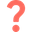
Проанализируйте и изложите содержательный смысл полученных результатов.

### **Задача 3.**
Реализуйте самостоятельно функцию `top_k_discords()` в модуле *discords.py*, предназначенную для поиска top-$k$ диссонансов во временном ряде на основе матричного профиля. Чтобы исключить попадание тривиальных совпадений в результирующее множество диссонансов воспользуйтесь функцией `apply_exclusion_zone()` из модуля *utils.py*.

Загрузите временной ряд *nyc_taxi.csv* из директории *./datasets/part1/*, содежащий данные о среднем числе пассажиров NY такси за осень 2014 года.

In [12]:
ts_url = './datasets/part1/nyc_taxi.csv'

ts = pd.read_csv(ts_url, index_col=0, header=0).squeeze().to_numpy()
plot_ts(ts, "Input time series")

In [13]:
m = 96
excl_zone = int(np.ceil(m / 2))
mp = {}

mp=compute_mp(ts, m, excl_zone)

In [19]:
top_k = 15
discords = {}

discords=top_k_discords(mp, top_k)

Выполните визуализацию найденных top-$k$ диссонансов.

In [20]:
plot_discords(mp, discords)

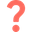
Проанализируйте и изложите содержательный смысл полученных результатов.

## **Часть 2.** Сегментация повторяющихся активностей.

### **Задача 4.**

Загрузите временной ряд PAMAP *pamap.csv* из директории *./datasets/part2/*, представляющий собой показания закрепленного на человеке виброакселерометра. Данный ряд включает показания, снятые при выполнении человеком трех видов физической активности: ходьба, подъем по лестнице и спуск по лестнице. Необходимо сегментировать временной ряд на основе его матричного профиля для определения того, когда человек шел и когда поднимался/спускался. Поскольку подъем и спуск по лестнице – это схожие действия, поэтому будем считать, что это одна активность.  

In [21]:
ts_url = './datasets/part2/pamap.csv'

ts = pd.read_csv(ts_url, header=None).squeeze().to_numpy()

Визуализируйте временной ряд PAMAP.

In [22]:
plot_ts(ts, "Input time series")

Найдите и визуализируйте матричный профиль временного ряда.

In [23]:
m = 100
excl_zone = m
mp = {}

mp=compute_mp(ts, m, excl_zone)

In [24]:
plot_ts(mp['mp'], "Matrix Profile")

Вычислите порог по формуле, которая представлена в презентации [04 Matrix profile.pdf](https://github.com/mzym/TimeSeriesCourse/blob/main/slides/04%20Matrix%20profile.pdf).

In [25]:
import numpy as np

def calculate_threshold(mp, threshold_multiplier=0.95):

    profile_distances = np.array(mp['mp'], dtype=float)
    finite_max = np.max(profile_distances[np.isfinite(profile_distances)])

    profile_distances[np.isposinf(profile_distances)] = finite_max

    if np.all(profile_distances == profile_distances[0]):
        return profile_distances[0]

    median_distance = np.median(profile_distances)
    print("Median distance:", median_distance)

    std_distance = np.std(profile_distances)
    print("Standard deviation distance:", std_distance)

    threshold = median_distance - threshold_multiplier * std_distance
    print("Calculated threshold:", threshold)

    return threshold

threshold = calculate_threshold(mp)



Median distance: 4.44251172104642
Standard deviation distance: 3.2940800498286946
Calculated threshold: 1.31313567370916


Выполните визуализацию результатов сегментации повторяющихся активностей.

In [26]:
plot_segmentation(mp, threshold)

Загрузите истинную разметку временного ряда PAMAP *pamap_labels.csv*, где 0 означает ходьбу, 1 – подъем по лестнице, 2 – спуск с лестницы. Вычислите точность по метрике accuracy, сравнив полученные результаты по основе матричного профиля с истинной разметкой.

In [27]:
labels_url = './datasets/part2/pamap_labels.csv'

labels = pd.read_csv(labels_url, header=None).squeeze().to_numpy()

In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# 1. Загрузка истинных меток из pamap_labels.csv

# 2. Получение предсказанных меток (на основе матричного профиля и порога)
def segment_activities(mp, threshold):
    profile_distances = np.array(mp['mp'], dtype=float)
    predicted_labels = np.zeros(len(profile_distances), dtype=int)

    predicted_labels[profile_distances > threshold] = 1  # Подъем по лестнице
    predicted_labels[profile_distances < threshold / 2] = 2  # Спуск с лестницы

    return predicted_labels

predicted_labels = segment_activities(mp, threshold)

# Проверка длины массивов
print(f"Длина true_labels: {len(labels)}")
print(f"Длина predicted_labels: {len(predicted_labels)}")

# Приведение длин к одному размеру
min_length = min(len(labels), len(predicted_labels))
labels = labels[:min_length]
predicted_labels = predicted_labels[:min_length]

# 3. Вычисление точности по метрике accuracy
accuracy = accuracy_score(labels, predicted_labels)
print(f"Точность сегментации по метрике accuracy: {accuracy:.2%}")


Длина true_labels: 31000
Длина predicted_labels: 30901
Точность сегментации по метрике accuracy: 34.61%


## **Чaсть 3.** Casy Study: Раскрытие краж электричества подменой счетчиков (meter-swapping detection).


### **Задача 5.**

Рассмотрим практическое применение использования матричного профиля для решения задачи, связанной с раскрытием краж электричества путем подмены счетчиков.

Загрузите временные ряды из директории *./datasets/part3/*, которые были выбраны случайным образом из набора данных (House 1, 2, 3, 4 и 11), содержащего данные потребления электроэнергии 20 жилых домов в Великобритании с 1 января по 23 декабря 2014 года.

In [37]:
path = './datasets/part3/'

house_idx = [1, 2, 3, 4, 11]

filenames = [f"House{i}.csv" for i in house_idx]

consumptions = {}
for house in filenames:
    consumptions[house[:-4]] = pd.read_csv(os.path.join(path, house), header=None, index_col=0)
    consumptions[house[:-4]].index = pd.to_datetime(consumptions[house[:-4]].index, format="%Y-%m-%d %H:%M:%S")

# Очистка данных от NaN после загрузки
for house, df in consumptions.items():
    # Интерполяция для заполнения NaN
    df_cleaned = df.interpolate(method='linear')
    # Удаление оставшихся NaN
    df_cleaned = df_cleaned.dropna()
    consumptions[house] = df_cleaned

Далее смоделируем событие замены счетчика. Для этого каждый временной ряд разделим на две части: "Head" (до 1 октября) и "Tail" (после 1 октября). После чего выберем случайным образом 2 временных ряда (например, House1 и House11) и поменяем местами их "Tail" части.

In [39]:
# Разделение на 'heads' и 'tails'
cutoff = pd.to_datetime('2014-10-01')
heads, tails = heads_tails(consumptions, cutoff, house_idx)

# Обмен 'Heads' и 'Tails' домов 1 и 11
swap1, swap2 = 1, 11
consumptions[f'House{swap1}'] = pd.concat([heads[f'H_{swap1}'], tails[f'T_{swap2}']])
consumptions[f'House{swap2}'] = pd.concat([heads[f'H_{swap2}'], tails[f'T_{swap1}']])
heads, tails = heads_tails(consumptions, cutoff, house_idx)

Визуализируйте исходные временные ряды и параллельную оси OY прямую, которая делит временные ряды на "Head" и "Tail" части.

In [40]:
plot_consumptions_ts(consumptions, cutoff, house_idx)

Чтобы найти переставленную пару временных рядов, выполним следующее. Сначала составим временные ряды $H_i$ из всевозможных комбинаций "Head" и "Tail" частей исходных временных рядов $T_K$, где $1 \leq i \leq |T|^2$, $1 \leq K \leq |T|$. В нашем случае, $|T| = 5$.  Далее среди них найдем такую пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$. Минимальная оценка $swap\_score$ для пары рядов $(H_i, H_j)$ вычисляется следующим образом:

\begin{equation}
swap\_score(i,j) = \frac{\min{(Head_{H_i} \bowtie Tail_{H_j})}}{\min{(Head_{H_i} \bowtie Tail_{H_i})}+eps},
\end{equation}

где $\bowtie$ – операция нахождения матричного профиля между двумя временными рядами. Матричный профиль между двумя временными рядами содержит расстояния между всеми подпоследовательностями первого временного ряда и их ближайшими соседями, которые являются подпоследовательностями второго временного ряда.

Добавьте в функцию `compute_mp()` в модуле *mp.py* поддежку вычисления матричного профиля между двумя различными временными рядами и найдите пару временных рядов $(H_i, H_j)$, которая имеет минимальную оценку $swap\_score$ среди всех пар.

In [49]:
m = 24 * 4

min_score = meter_swapping_detection(heads, tails, house_idx, m)

/usr/local/lib/python3.10/dist-packages/stumpy/core.py:3703: UserWarning:

Arrays T_A, T_B are not equal, which implies an AB-join. `ignore_trivial` has been automatically set to `False`.



In [50]:
min_i, min_j, mp_j = min_score['i'], min_score['j'], min_score['mp_j']
print(f'Временные ряды с минимальной оценкой: (H_{min_i}, T_{min_j}).')

Временные ряды с минимальной оценкой: (H_3, T_1).


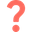
Проанализируйте и изложите содержательный смысл полученных результатов.

*# WRITE YOUR ANSWER*